Shape of the image tensor after preprocessing: torch.Size([3, 224, 224])


100%|██████████| 1000/1000 [01:37<00:00, 10.24it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


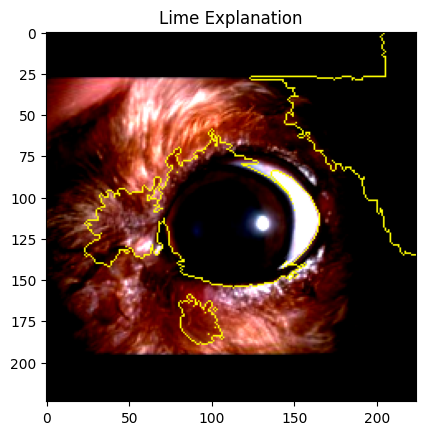

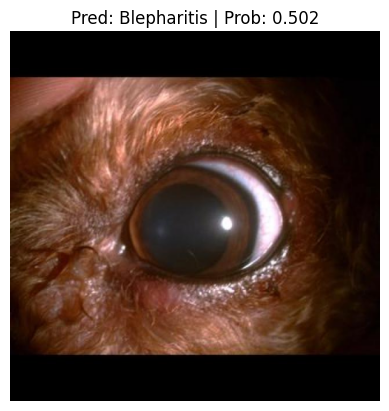

In [4]:

import torch
from PIL import Image
from torchvision import transforms
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from going_modular.going_modular.predictions import pred_and_plot_image

saved_model_path = "/Users/chamidiperera/Documents/FYP Codes/savedModels/eye/pretrained_vit_eye_final.pth"
pretrained_vit = torch.load(saved_model_path)
pretrained_vit.eval()

custom_image_path = "/Users/chamidiperera/Documents/FYP Codes/Care/backend/models/vit/eye/crop_D6_3dae9c79-60a5-11ec-8402-0a7404972c70_jpg.rf.c6c524ea7d078cc4836c0944048144b5.jpg"


transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),          
    transforms.Normalize(            
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

image = Image.open(custom_image_path)
image = image.convert("RGB")
image = transform(image)

print("Shape of the image tensor after preprocessing:", image.shape)


def predict_fn(images):
    images = torch.tensor(images)
    images = images.permute(0, 3, 1, 2)
    with torch.no_grad():
        outputs = pretrained_vit(images)
    return outputs

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(image.permute(1, 2, 0).numpy(), predict_fn, top_labels=5, num_samples=1000)


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
image_boundry = mark_boundaries(temp / 2 + 0.5, mask)
plt.imshow(image_boundry)
plt.title('Lime Explanation')
plt.savefig('lime_explanation.png')
plt.show()

class_names = ['Blepharitis', 'Conjunctivitis', 'Entropion', 'EyelidTumor', 'HealthyEye', 'Mastopathy', 'Nuclear Sclerosis', 'Pigmented Keratitis']
pred_and_plot_image(model=pretrained_vit, image_path=custom_image_path, class_names=class_names)
plt.savefig('prediction_plot.png')
plt.show()


Shape of the image tensor after preprocessing: torch.Size([3, 224, 224])


100%|██████████| 1000/1000 [01:20<00:00, 12.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


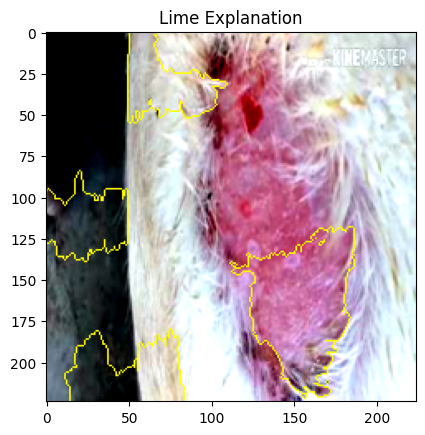

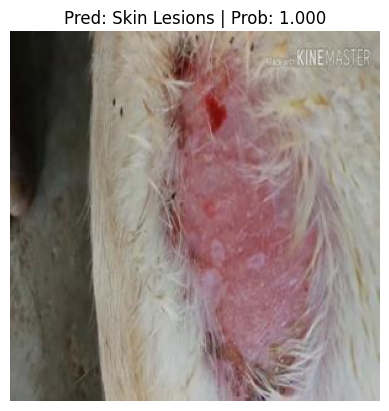

In [5]:
import os
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from going_modular.going_modular.predictions import pred_and_plot_image

saved_model_path = "/Users/chamidiperera/Documents/FYP Codes/savedModels/skin/pretrained_vit_skin_final.pth"
pretrained_vit = torch.load(saved_model_path)
pretrained_vit.eval()

custom_image_path = "/Users/chamidiperera/Documents/FYP Codes/Care/backend/models/vit/skin/skin lessions.jpg"


transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to match the model's input size
    transforms.ToTensor(),           # Convert the image to a PyTorch tensor
    transforms.Normalize(            # Normalize the image
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Preprocess the image
image = Image.open(custom_image_path)
image = image.convert("RGB")
image = transform(image)

print("Shape of the image tensor after preprocessing:", image.shape)



def predict_fn(images):
    images = torch.tensor(images)
    images = images.permute(0, 3, 1, 2)
    with torch.no_grad():
        outputs = pretrained_vit(images)
    return outputs

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(image.permute(1, 2, 0).numpy(), predict_fn, top_labels=5, num_samples=1000)

# Visualize the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
image_boundry = mark_boundaries(temp / 2 + 0.5, mask)
plt.imshow(image_boundry)
plt.title('Lime Explanation')
plt.savefig('lime_explanation_skin.png')
plt.show()

class_names = ['Circlar Alopecia','Flees','Healthy','Runglong','Skin Lesions']
pred_and_plot_image(model=pretrained_vit, image_path=custom_image_path, class_names=class_names)
plt.savefig('prediction_plot_skin.png')
plt.show()
